# Structure of all recorded data

This document has the purpose to familiarize the reader with what data was recorded and how it is organized.

In [2]:
# Run at start of document. make sure helpers.py is located in same folder as this notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from helpers import *

import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import pickle

def save_obj(obj, name, path = 'obj/'):
    with open(path + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name, path = 'obj/'):
    with open(path + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## What did I take home
The raw data consisted of four recordings: Silab recordings, python recordings, questionnaires and eye tracker recordings. What I took instead was information about areas of interests that the gaze marker was in. See section Eye Tracker.

## Folder structure

* **Silab:** The Silab data is located in the 'SilabEssentials' folder. Inside this folder are csv files with all scenarios for each participant (noted by a 4-letter anonymized pseudonym). For instance, `PVNTnoucrain.csv` contains the data for participant PVNT in scenario noucrain (No Uncertainty Communication, Rain).
* **Python:** The Python recordings are stored in 'Participants/{participant}/pyrec'
* **Questionnaire:** Stored in 'Questionnaires' folder. 
* **Eye Tracker** Stored in 'Participants/{participant}/eye'

## Conventions
* Participants all have a 4-digit pseudonym, for instance 'OYWO'
* Experiments, also called scenarios, start with 'uc' (uncertainty communication enabled) or 'nouc' (no uncertainty communication). A summary:
  1. **noucfog:** No Uncertainty Communication, fog only. An open road (no tunnel or rain) means that the system is working properly and gives accurate descriptions of vehicles that are far ahead. Communication starts at a TTC of <9s. The human is uncertain in this scenario due to the fog. 
  2. **nouctun:** No uncertainty communication, tunnel (with fog). Here the human as well as the machine are made uncertain. The human is uncertain since there is limited lookahead due to the fog. The machine is uncertain because the car is driving in the tunnel (and the system has less accurate estimates in tunnels or in rain). The **nouc** tag means that, in this experimental run, the machine had no means of communicating these less accurate estimates and therefore communicates nothing until obstacles are close enough to be a confident estimate.
  3. **uctun:** Again, the human as well as the machine are uncertain. Only here, the machine has a way to communicate about cars further ahead by presenting the broad, oscillating motion over the range it is certain that the obstacle is in.
  4. **noucrain** No Uncertainty Communication, rain. The machine is uncertain about objects further ahead because it rains. The observations of the human should not be affected much since there is a clear, open view of surroundings. In the nouc mode, cars are only noticed when the vehicle is close enough (20? meters, \todo: verify). 
  5. **ucrain** Again, vehicle is uncertain but human is not. This time, the vehicle uses the uncerainty communication feature when there is a car further away with less accurate estimates. 
  
* An Experiment consists of multiple trials. A trial is for instance a car from the front, on your own lane. This is encountered multiple times during one experimental run. In this document I will not extract separate trials from the experimennts since the goal of this doc is to get an overview of what data is there.
  
  

## Before starting
Make sure that this notebook is inside the data directory. It will load subdirectories ('/Participants/' and 'SilabEssentials'). If the data is stored elsewhere, point it to the correct directory here:




In [5]:
# Change data directory: (fill in without / at the end.)
datadir = '00Taken'

# Example of Silab data for 1 participant and 1 scenario


In [11]:
participants = [x for x in listdir(f'{datadir}/Participants') if len(x) == 4] #list of all participants
participant = 'MVNT' # Select one participant to demonstrate data
scenario = 'noucfog' #


silab_data = pd.read_csv(f'{datadir}/SilabEssentials/{participant}{scenario}.csv', index_col = 0)

In [9]:
# Show csv structure (first 7 values)
silab_data.iloc[:7]

,MeasurementTime,ttc_F,ttc_FL,ttc_FR,ttc_B,ttc_BL,ttc_BR,steer,brake,vEgo,ttc_min,ttc_min_dir
0,9.27,inf,inf,inf,inf,inf,inf,-0.0,0.0,0.0,inf,F
1,10.96,inf,inf,inf,inf,inf,inf,-0.0,0.0,0.0,inf,F
2,20.00,inf,inf,inf,inf,inf,inf,-0.0,0.0,0.0,inf,F
3,30.00,inf,inf,inf,inf,inf,inf,-0.0,0.0,0.0,inf,F
4,40.00,inf,inf,inf,inf,inf,inf,-0.0,0.0,0.0,inf,F
5,50.60,inf,inf,inf,inf,inf,inf,-0.0,0.0,0.0,inf,F
6,60.00,inf,inf,inf,inf,inf,inf,-0.0,0.0,0.0,inf,F


### What the column names mean
See the table below

| Name| Description|
|:---|:---|
|MeasurementTime| Silab Timestamp [ms]|
|ttc_F, ttc_FL etc.| Calculated TTC values from all directions|
|steer|Steer angle|
|brake|brake activation|
|vEgo|velocity|
|ttc_min|lowest TTC (most urgent)|
|ttc_min_dir|direction of lowest ttc|


# Example of Python data for 1 participant and 1 scenario

In [12]:
file = listdir(f'{datadir}/Participants/{participant}/pyrec')[0] #first file in directory to pick any scenario.
python_data = pd.read_csv(f'{datadir}/Participants/{participant}/pyrec/{file}', index_col = 0)


In [13]:
# show first 7 rows of data
python_data.iloc[:7]

,angle_front,angle_rear,b1,b2,b3,b4,confB,confF,lane,muf,...,t_silab,ttcBL,ttcBM,ttcBR,ttcCL,ttcCR,ttcFL,ttcFM,ttcFR,vEgo
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,FL,...,0.0,inf,inf,inf,inf,inf,inf,inf,inf,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,FL,...,0.0,inf,inf,inf,inf,inf,inf,inf,inf,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,FL,...,0.0,inf,inf,inf,inf,inf,inf,inf,inf,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,FL,...,0.0,inf,inf,inf,inf,inf,inf,inf,inf,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,FL,...,0.0,inf,inf,inf,inf,inf,inf,inf,inf,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,FL,...,0.0,inf,inf,inf,inf,inf,inf,inf,inf,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,FL,...,0.0,inf,inf,inf,inf,inf,inf,inf,inf,0.0


### Column names and descriptions
Not all columns are visible in the above representation. A list of available columns:

|Name|Description|
|:---|:---|
|angle_front, angle_rear | At what angles the active vibrators are vibrating |
|b1, b2, b3, b4 | The borders where the ball (active vibrator) is bouncing between in uncertainty com. mode|
|confB, confF| confidence front and back. Function of the distance of objects (further away = less certain)|
|lane| current lane|
|muf, mur|most urgent direction front/rear. Only one object can be felt, the most urgent (lowest ttc)|
|pBL, pBM, etc.| for all directions the p parameter is the intensity of the belt, varying between 0 and 1|
|t_eye, t_silab, t_python| timestamps for all recorders. Used for synchronization|
|ttcBL etc.|Python-side computed TTC values. Not sure if correct values. See the Silab data for correct values.|
|vEgo|Velocity|






In [14]:
# list available keys()
python_data.keys()

Index(['angle_front', 'angle_rear', 'b1', 'b2', 'b3', 'b4', 'confB', 'confF',
       'lane', 'muf', 'mur', 'pBL', 'pBM', 'pBR', 'pFL', 'pFM', 'pFR', 't_eye',
       't_python', 't_silab', 'ttcBL', 'ttcBM', 'ttcBR', 'ttcCL', 'ttcCR',
       'ttcFL', 'ttcFM', 'ttcFR', 'vEgo'],
      dtype='object')

# Questionnaire Data



## NASA TLX
The workload score data is organized as a csv file 'NASATLX_df.csv' in the Questionnaires folder.

Each column is the calculated workload for that experimental condition (see 'Conventions' at beginning of document.)

In [7]:
tlx_df = pd.read_csv(f'{datadir}/Questionnaires/NASATLX_df.csv', index_col = 0)
tlx_df
participants = load_obj('participants')

<IPython.core.display.Javascript object>


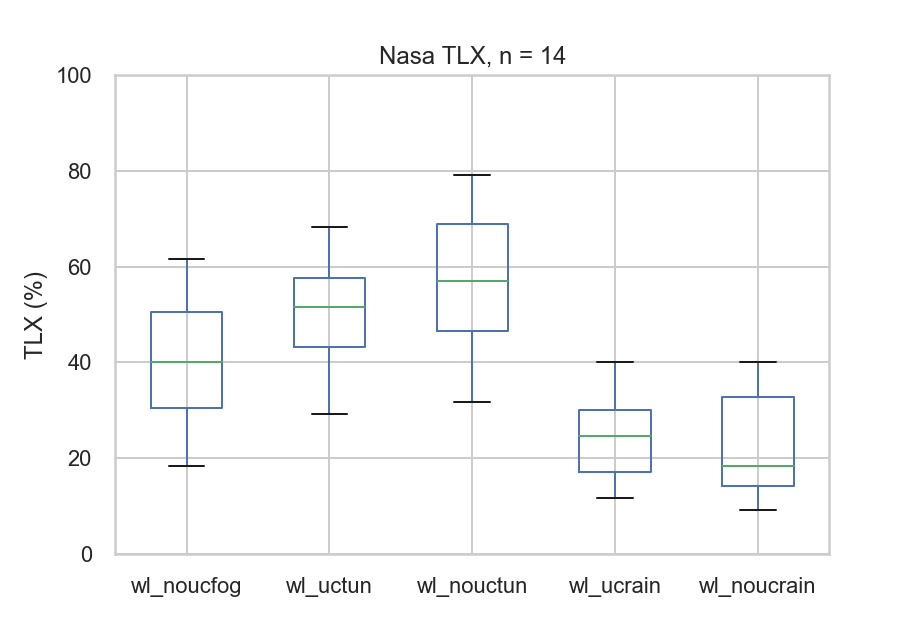

Text(0,0.5,'TLX (%)')

In [12]:
# Plotting nasa TLX.
%matplotlib notebook
fig, ax = plt.subplots()
tlx_df[["wl_noucfog", "wl_uctun", "wl_nouctun","wl_ucrain",  "wl_noucrain"]].boxplot(ax=ax)
plt.title(f'Nasa TLX, n = {len(participants)}')
plt.ylim(0, 100)
plt.style.use('seaborn-paper')

ax.set_ylabel('TLX (%)')




In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

#load nasa tlx dataframe
datadir = '00Taken'
tlx_df = pd.read_csv(f'{datadir}/Questionnaires/NASATLX_df.csv', index_col = 0)

keys = ["wl_noucfog", "wl_uctun", "wl_nouctun","wl_ucrain",  "wl_noucrain"]
out = pd.DataFrame({'Raw TLX':[], 'condition':[]})

for key in keys:
    vals = tlx_df[key]
    df = pd.DataFrame({'Raw TLX':vals, 'condition':[key]*len(vals)})
    out = pd.concat([out,df])
    
out = out.replace(["wl_noucfog", "wl_uctun", "wl_nouctun","wl_ucrain",  "wl_noucrain"],
            ['MC-HU', 'MU-HU-uc', 'MU-HU', 'MU-HC-uc', 'MU-HC']) #replace labels

plt.subplots(figsize = (5,3))
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.boxplot(x="condition", y='Raw TLX', data=out, showfliers = False, color = 'skyblue')
ax = sns.swarmplot(x="condition", y="Raw TLX", data=out, color=".25")
ax.set_xlabel('')
ax.set_ylim(0,100)
plt.tight_layout()

# plt.savefig('figs/tlx.eps')

NameError: name 'pd' is not defined

In [86]:
!ls figs

1.png           4a.png          6.png           areas.png       tlx.eps
2.png           4b.png          7.png           distancestamps
3.png           5.png           QuestLayout.psd mttcbox.png


In [68]:
out.replace(['wl_noucfog', 'wl_uctun'], ['a','b'])

,Raw TLX,condition
0,42.500000,a
1,61.666667,a
2,53.333333,a
3,31.666667,a
4,55.000000,a
5,21.666667,a
6,40.833333,a
7,39.166667,a
8,60.833333,a
9,19.166667,a


In [41]:
cond

,condition
0,wl_noucrain
1,wl_noucrain
2,wl_noucrain
3,wl_noucrain
4,wl_noucrain
5,wl_noucrain
6,wl_noucrain
7,wl_noucrain
8,wl_noucrain
9,wl_noucrain


In [31]:
from scipy.stats import wilcoxon
wilcoxon(tlx_df['wl_noucfog'],tlx_df[ 'wl_uctun'])

WilcoxonResult(statistic=19.0, pvalue=0.06403014843302322)

In [32]:
0.064/2

0.032

# Van de Laan Usefulness/satisfation
Each row belongs to a participant. Each experimental condition has 2 columns: one for usefullness (ends with \_ufl) and one for satisfation (ends with \_sat).

In [17]:
vdl_df = pd.read_csv(f'{datadir}/Questionnaires/vandelaan_df.csv', index_col = 0)
vdl_df

,id,noucfog_ufl,noucfog_sat,noucrain_ufl,noucrain_sat,nouctun_ufl,nouctun_sat,ucrain_ufl,ucrain_sat,uctun_ufl,uctun_sat
0,NNTZ,1.8,0.75,0.0,0.00,0.4,0.25,0.2,0.00,1.8,1.25
1,XSMS,0.4,-0.25,-1.4,0.00,-0.4,-0.50,0.0,0.00,0.6,0.50
2,ZPQX,1.2,1.00,-1.2,0.25,-0.4,-0.75,0.6,0.75,1.8,2.00
3,TTQW,1.2,0.50,-0.4,-0.25,-0.8,0.00,-0.6,-0.50,1.4,0.25
4,TWOU,2.0,1.75,-0.6,0.00,1.0,1.00,0.8,0.25,1.6,1.25
5,OYWO,1.2,0.25,0.2,0.50,-1.0,-1.00,-1.2,-1.75,1.0,0.50
6,SPPV,0.8,1.00,-0.2,0.00,-0.2,-0.25,-0.4,1.00,1.0,1.00
7,PVOU,1.4,1.25,0.4,1.00,-1.0,-0.25,-0.2,1.00,1.8,0.75
8,TTVN,2.0,1.50,-1.2,0.00,-0.4,-0.50,1.0,1.00,2.0,1.75
9,WVPV,1.6,0.50,-1.2,0.00,-0.6,-0.75,0.4,0.00,1.4,0.00


(-2.3, 2.3)

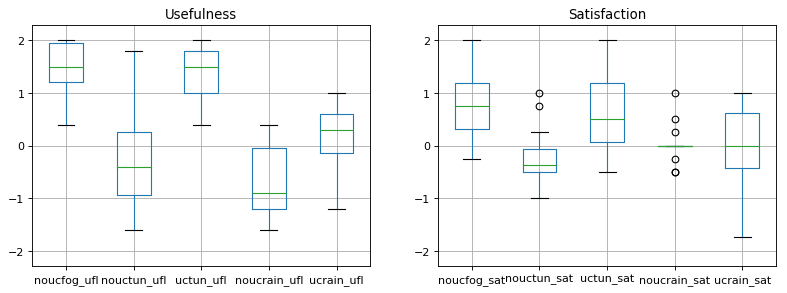

In [18]:
#Plotting van de laan 
usefulness_df = vdl_df[["id", "noucfog_ufl", "nouctun_ufl", "uctun_ufl", "noucrain_ufl", "ucrain_ufl"]]
satisfaction_df = vdl_df[["id", "noucfog_sat", "nouctun_sat", "uctun_sat", "noucrain_sat", "ucrain_sat"]]

fig = plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Usefulness')
ax_ufl = usefulness_df.boxplot()
ax_ufl.set_ylim([-2.3,2.3])

plt.subplot(1,2,2)
plt.title('Satisfaction')
ax_sat = satisfaction_df.boxplot()
ax_sat.set_ylim([-2.3,2.3])

## Reliance, confidence, trust
I also made some more questions about reliance, confidence and trust. Answers were provided on a 5 point Likert scale (strongly disagree (SD) - strongly agree(SA)). 

Robbins et al. (2011) recommend diverging stacked bar charts to visualize Likert responses.
B Robbins, Naomi; M Heiberger, Richard (2011). "Plotting Likert and Other Rating Scales". JSM 2011: 1058–1066.

Found a way to make this with pandas here. https://stackoverflow.com/questions/23142358/create-a-diverging-stacked-bar-chart-in-matplotlib 

I will make the plot labels more intuitive later. 

### The questions: 

* 1. The other road users made me unconfident
* 2. The weather conditions made me unconfident
* 3. The signals from the belt made me unconfident
* 4a. The machine was sometimes uncertain about the exact location of a vehicle
* 4b. The machine told me it was uncertain about the exact location of a vehicle* 
* 5. I relied on what I perceived with my eyes
* 6. I relied on what I perceived through the belt
* 7. I had trust in my own capabilities

\* only asked 4b to a few participants since I came up with the subtle but important difference between 4a and 4b when I already conducted some experiments


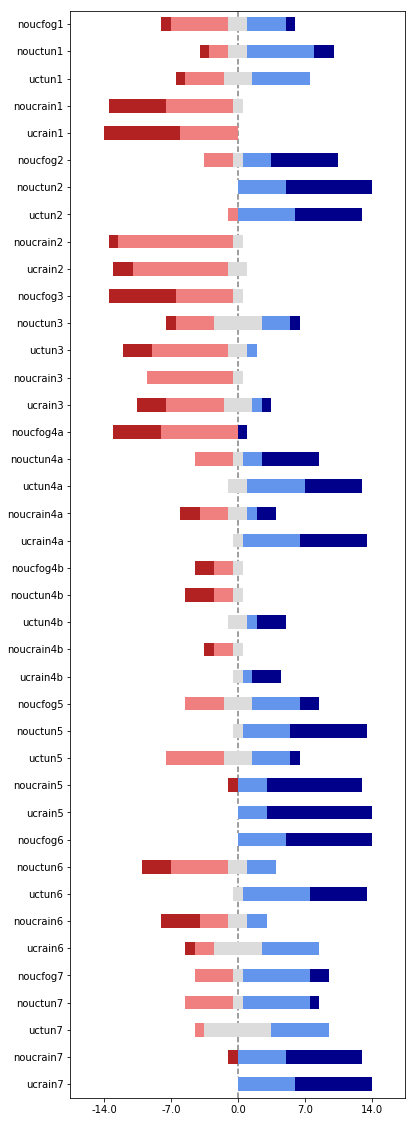

In [21]:
# Plot responses
likert_df = pd.read_csv(f'{datadir}/Questionnaires/likertreliance_df.csv', index_col=0)
plot_likert(likert_df)
#plt.tight_layout()

# Eye tracking data

## Raw recording
The folder DemoRecording contains a full eye tracking recording of a dummy participant. If you feel like playing around with this, these recordings can be opened in 'pupil player', freely available here: https://github.com/pupil-labs/pupil/releases

A recording is loaded by dragging a recorder folder (e.g. Participants/TTVN/eye/000) into the software.

## Current recording
In this document however, I will stick with what I took from the real participant, which is data that was already processed by the eye tracking software and thus contains no video data. 

I defined a couple of areas I am interested in, see the image below:

<img src="figs/areas.png" alt="Drawing" style="width: 900px;"/>

The software identified when the marker crossed the boundaries of the . The areas have names such as 'leftmirr' meaning left mirror. 'leftmirr_optimist' is the larger area around the left mirror. This larger area also catches gaze positions if the marker slightly drifted away from the calibration. This is of course also more vulnarable to false positives.

Each recording is boiled down into many csv files, two of which seem relevant to me: `surface_events.csv` and `surface_gaze_distribution.csv`. The first file has all the timestamps stored for when an area was entered or exited. The second file counted these events. Below is an example of both files.



In [ ]:
surface_events.

In [15]:
# Example of surface events data (first 10 entries)
surface_events = pd.read_csv(f'{datadir}/Participants/{participant}/eye/000/exports/000/surfaces/surface_events.csv')


\begin{tabular}{lrrlrl}
\toprule
{} &  frame\_number &      timestamp &        surface\_name &   surface\_uid & event\_type \\
\midrule
0 &             0 &  529022.291216 &             topmirr &  1.539264e+09 &      enter \\
1 &             0 &  529022.291216 &    topmirr\_optimist &  1.539352e+09 &      enter \\
2 &             0 &  529022.291216 &            leftmirr &  1.539353e+09 &      enter \\
3 &             0 &  529022.291216 &   leftmirr\_optimist &  1.539353e+09 &      enter \\
4 &             0 &  529022.291216 &         frontwindow &  1.539353e+09 &      enter \\
5 &             0 &  529022.291216 &  instrument\_cluster &  1.539353e+09 &      enter \\
6 &           564 &  529041.191081 &             topmirr &  1.539264e+09 &       exit \\
7 &           564 &  529041.191081 &    topmirr\_optimist &  1.539352e+09 &       exit \\
8 &           568 &  529041.325123 &             topmirr &  1.539264e+09 &      enter \\
9 &           568 &  529041.325123 &    topmirr\_optimist &

In [34]:
# Example of counted data:
surface_gaze_distribution = pd.read_csv(f'{datadir}/Participants/{participant}/eye/000/exports/000/surfaces/surface_gaze_distribution.csv')
surface_gaze_distribution
df = surface_gaze_distribution

In [35]:
df

,total_gaze_point_count,27292
0,surface_name,gaze_count
1,topmirr,1541
2,topmirr_optimist,2885
3,leftmirr,78
4,leftmirr_optimist,166
5,frontwindow,19097
6,instrument_cluster,1598
7,not_on_any_surface,4077


In [36]:
df = df.iloc[1:,:]

In [37]:
df.columns = ['Surface Name','Count']

In [38]:
print(df.to_latex())

\begin{tabular}{lll}
\toprule
{} &        Surface Name &  Count \\
\midrule
1 &             topmirr &   1541 \\
2 &    topmirr\_optimist &   2885 \\
3 &            leftmirr &     78 \\
4 &   leftmirr\_optimist &    166 \\
5 &         frontwindow &  19097 \\
6 &  instrument\_cluster &   1598 \\
7 &  not\_on\_any\_surface &   4077 \\
\bottomrule
\end{tabular}

